In [1]:
print("Shree")

Shree


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   


In [3]:
data_2001 = pd.read_csv('2001_census.csv')
data_2011 = pd.read_csv('2011_census.csv')
data_2021 = pd.read_csv('2021_census.csv')

In [21]:
grouped_data_2001 = data_2001.groupby(data_2001.columns[0]).sum()
grouped_data_2011 = data_2011.groupby(data_2011.columns[0]).sum()
grouped_data_2021 = data_2021.groupby(data_2021.columns[0]).sum()

In [22]:
british_2001 = grouped_data_2001['White British']
british_2011 = grouped_data_2011['White British']
british_2021 = grouped_data_2021['White British']


In [23]:
combined_df = pd.concat(
    [british_2001, british_2011, british_2021], 
    axis=1
)

# Rename columns to reflect the year
combined_df.columns = ['British_2001', 'British_2011', 'British_2021']

In [24]:
combined_df

,British_2001,British_2011,British_2021
local authority name,,,
Barking and Dagenham,132566,91951,67558
Barnet,188301,162116,140792
Bexley,191947,179250,158871
Brent,76893,55887,51629
Bromley,255618,239480,219488
Camden,104390,96935,74343
City of London,4909,4243,3652
Croydon,210573,171738,146256
Ealing,135139,103034,89263


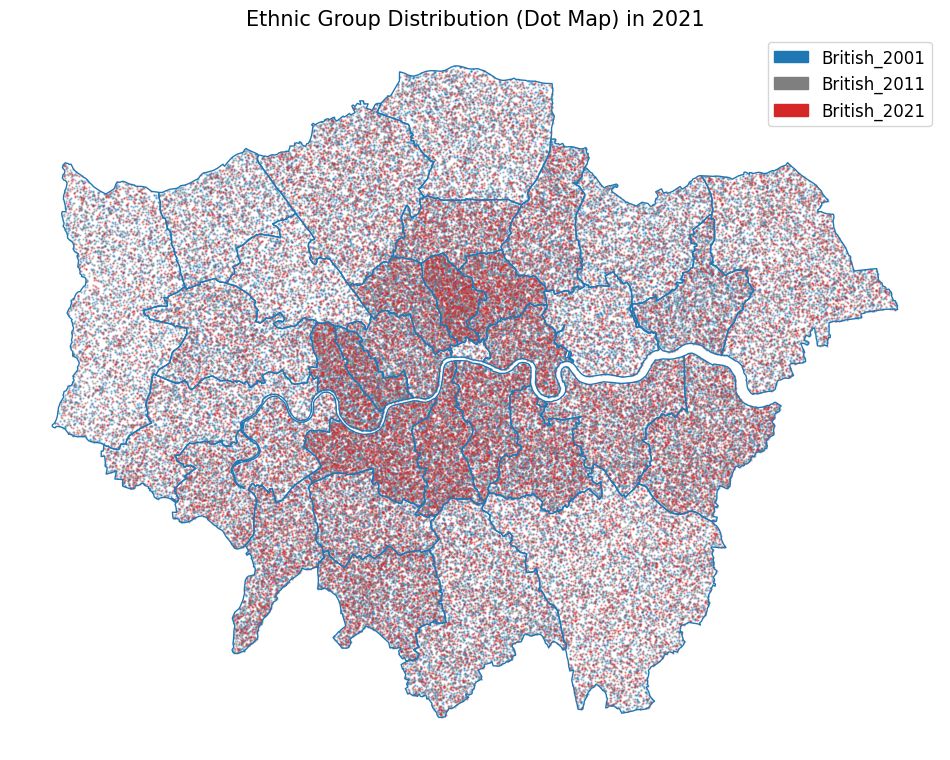

In [32]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point
import matplotlib.patches as mpatches  # For custom legend

# Load the census data
# Assuming 'grouped_data' is already available as the grouped census DataFrame
def random_point_in_polygon(polygon):
    """Generate a random point within a polygon"""
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        point = Point(x, y)
        if polygon.contains(point):
            return x, y


# Load the GeoJSON file
geo_df = gpd.read_file('london_421.geojson')
geo_df = geo_df.rename(columns={'name': 'local authority name'})  # Adjust if necessary
merged_data = geo_df.merge(combined_df, on='local authority name', how='left')


# Define ethnic groups and their colors
years_columns = combined_df.columns  # Excluding 'Total Population'
years_colors = ['tab:blue', 'tab:gray', 'tab:red']

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Sampling factor - Adjust this to control the density of dots
sampling_factor = 0.01  # For example, only plot 1% of the population

# Loop through each borough and generate points for each ethnic group
for borough, row in merged_data.iterrows():
    for ethnic_group, color in zip(years_columns, years_colors):
        population = row[ethnic_group]
        
        # Generate random points within the geometry of the borough, scaling population
        if population > 0:
            # Get the borough's polygon shape
            borough_geom = row['geometry']
            
            # Calculate the number of points to plot based on the population and sampling factor
            num_points = int(population * sampling_factor)  # Reduce number of points by sampling factor
            
            # Generate random points within the borough's boundary
            points = []
            for _ in range(num_points):
                x, y = random_point_in_polygon(borough_geom)
                points.append((x, y))
            
            # Convert points to a 2D numpy array (for scatter plotting)
            points = np.array(points)
            
            # Plot points only if there are any generated points
            if points.size > 0:
                ax.scatter(points[:, 0], points[:, 1], color=color, alpha=0.4, s=0.5)

# Plot the map
geo_df.boundary.plot(ax=ax, linewidth=1)
ax.set_title('Ethnic Group Distribution (Dot Map) in 2021', fontsize=15)
plt.axis('off')

# Create a custom legend
legend_labels = years_columns  # Ethnic group names
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(years_colors, legend_labels)]
ax.legend(handles=legend_patches, loc='upper right', fontsize=12)

plt.show()

# Function to generate a random point within a polygon


In [46]:
combined_df.columns[0]

'British_2001'

KeyError: 'B'

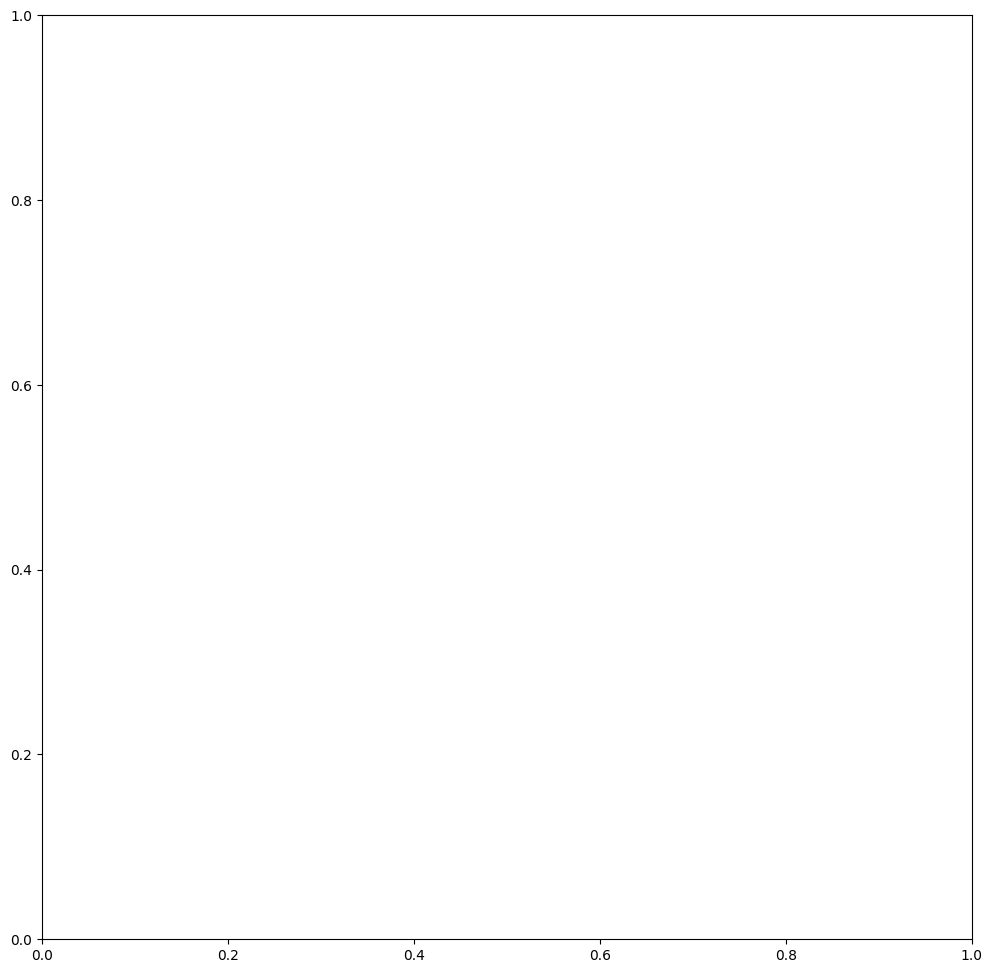

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point
import matplotlib.patches as mpatches  # For custom legend

# Load the census data
# Assuming 'grouped_data' is already available as the grouped census DataFrame
def random_point_in_polygon(polygon):
    """Generate a random point within a polygon"""
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        point = Point(x, y)
        if polygon.contains(point):
            return x, y


# Load the GeoJSON file
geo_df = gpd.read_file('london_421.geojson')
geo_df = geo_df.rename(columns={'name': 'local authority name'})  # Adjust if necessary
merged_data = geo_df.merge(combined_df, on='local authority name', how='left')


# Define ethnic groups and their colors
years_columns = combined_df.columns[0] # Excluding 'Total Population'
years_colors = ['tab:blue']

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Sampling factor - Adjust this to control the density of dots
sampling_factor = 0.01  # For example, only plot 1% of the population

# Loop through each borough and generate points for each ethnic group
for borough, row in merged_data.iterrows():
    for ethnic_group, color in zip(years_columns, years_colors):
        #population = row[ethnic_group]
                # Generate random points within the geometry of the borough, scaling population
        if population > 0:
            # Get the borough's polygon shape
            borough_geom = row['geometry']
            
            # Calculate the number of points to plot based on the population and sampling factor
            num_points = int(population * sampling_factor)  # Reduce number of points by sampling factor
            
            # Generate random points within the borough's boundary
            points = []
            for _ in range(num_points):
                x, y = random_point_in_polygon(borough_geom)
                points.append((x, y))
            
            # Convert points to a 2D numpy array (for scatter plotting)
            points = np.array(points)
            
            # Plot points only if there are any generated points
            if points.size > 0:
                ax.scatter(points[:, 0], points[:, 1], color=color, alpha=0.4, s=0.5)

# Plot the map
geo_df.boundary.plot(ax=ax, linewidth=1)
ax.set_title('Ethnic Group Distribution (Dot Map) in 2021', fontsize=15)
plt.axis('off')

# Create a custom legend
legend_labels = years_columns  # Ethnic group names
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(years_colors, legend_labels)]
ax.legend(handles=legend_patches, loc='upper right', fontsize=12)

plt.show()

# Function to generate a random point within a polygon


<Figure size 1000x1000 with 0 Axes>

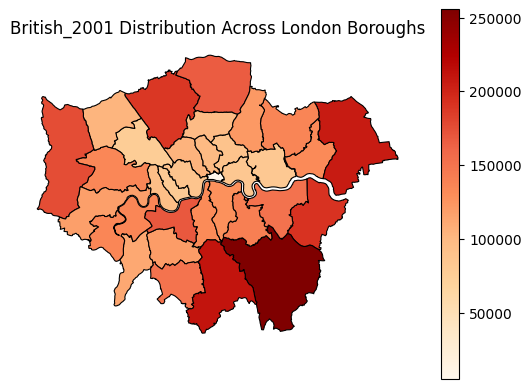

<Figure size 1000x1000 with 0 Axes>

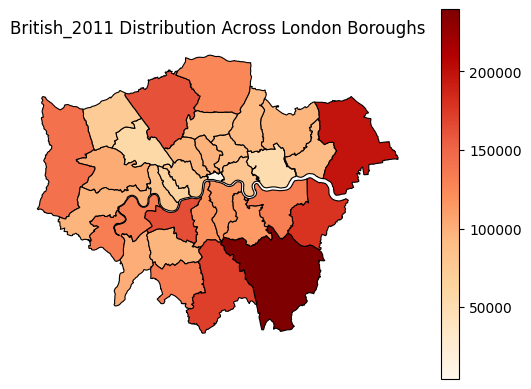

<Figure size 1000x1000 with 0 Axes>

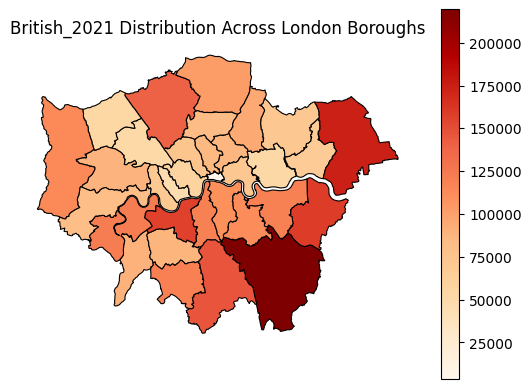

In [47]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the census data
# Assuming 'grouped_data' is already available as the grouped census DataFrame

# Load the GeoJSON file
geo_df = gpd.read_file('london_421.geojson')

# Ensure the 'local authority name' column in your data matches the borough names in the geo_df
geo_df = geo_df.rename(columns={'name': 'local authority name'})  # Update with actual column name
merged_data = geo_df.merge(combined_df, on='local authority name', how='left')

# Plot the choropleth for each ethnic group
year_columns = combined_df  # All ethnic columns, excluding 'Total Population'

# 1. Plotting a map for each ethnic group distribution
for column in year_columns:
    plt.figure(figsize=(10, 10))
    merged_data.plot(column=column, cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
    plt.title(f"{column} Distribution Across London Boroughs")
    plt.axis('off')
    plt.show()


KeyError: 'B'

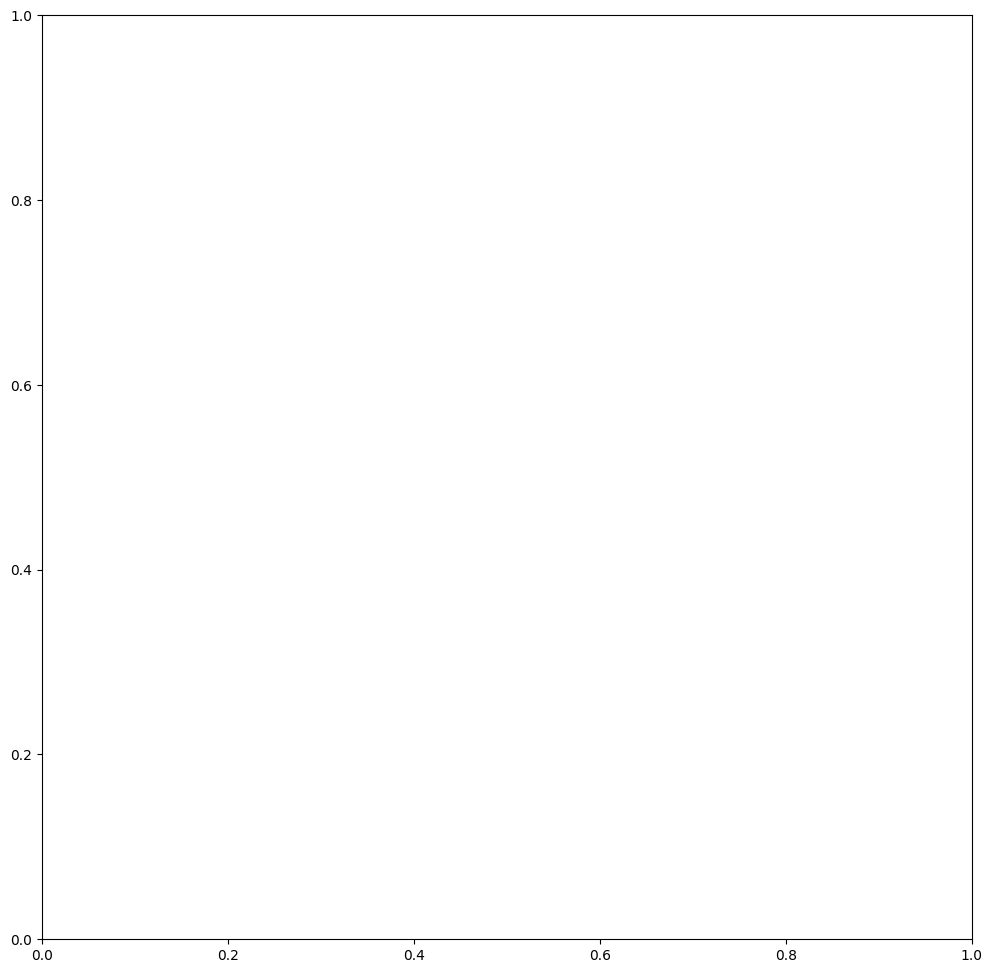

In [48]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point
import matplotlib.patches as mpatches  # For custom legend

# Load the census data
# Assuming 'grouped_data' is already available as the grouped census DataFrame
def random_point_in_polygon(polygon):
    """Generate a random point within a polygon"""
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        point = Point(x, y)
        if polygon.contains(point):
            return x, y


# Load the GeoJSON file
geo_df = gpd.read_file('london_421.geojson')
geo_df = geo_df.rename(columns={'name': 'local authority name'})  # Adjust if necessary
merged_data = geo_df.merge(combined_df, on='local authority name', how='left')


# Define ethnic groups and their colors
years_columns = combined_df.columns[0] # Excluding 'Total Population'
years_colors = ['tab:blue']

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Sampling factor - Adjust this to control the density of dots
sampling_factor = 0.01  # For example, only plot 1% of the population

# Loop through each borough and generate points for each ethnic group
for borough, row in merged_data.iterrows():
    for ethnic_group, color in zip(years_columns, years_colors):
        population = row[ethnic_group]
        
        # Generate random points within the geometry of the borough, scaling population
        if population > 0:
            # Get the borough's polygon shape
            borough_geom = row['geometry']
            
            # Calculate the number of points to plot based on the population and sampling factor
            num_points = int(population * sampling_factor)  # Reduce number of points by sampling factor
            
            # Generate random points within the borough's boundary
            points = []
            for _ in range(num_points):
                x, y = random_point_in_polygon(borough_geom)
                points.append((x, y))
            
            # Convert points to a 2D numpy array (for scatter plotting)
            points = np.array(points)
            
            # Plot points only if there are any generated points
            if points.size > 0:
                ax.scatter(points[:, 0], points[:, 1], color=color, alpha=0.4, s=0.5)

# Plot the map
geo_df.boundary.plot(ax=ax, linewidth=1)
ax.set_title('Ethnic Group Distribution (Dot Map) in 2021', fontsize=15)
plt.axis('off')

# Create a custom legend
legend_labels = years_columns  # Ethnic group names
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(years_colors, legend_labels)]
ax.legend(handles=legend_patches, loc='upper right', fontsize=12)

plt.show()

# Function to generate a random point within a polygon


C:\Users\Akshay Phatak\AppData\Local\Temp\ipykernel_17216\2082938874.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_data["centroid"] = merged_data.geometry.centroid
C:\Users\Akshay Phatak\AppData\Local\Temp\ipykernel_17216\2082938874.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_data['x'] = merged_data.centroid.x
C:\Users\Akshay Phatak\AppData\Local\Temp\ipykernel_17216\2082938874.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_data['y'] = merged_data.centroid.y


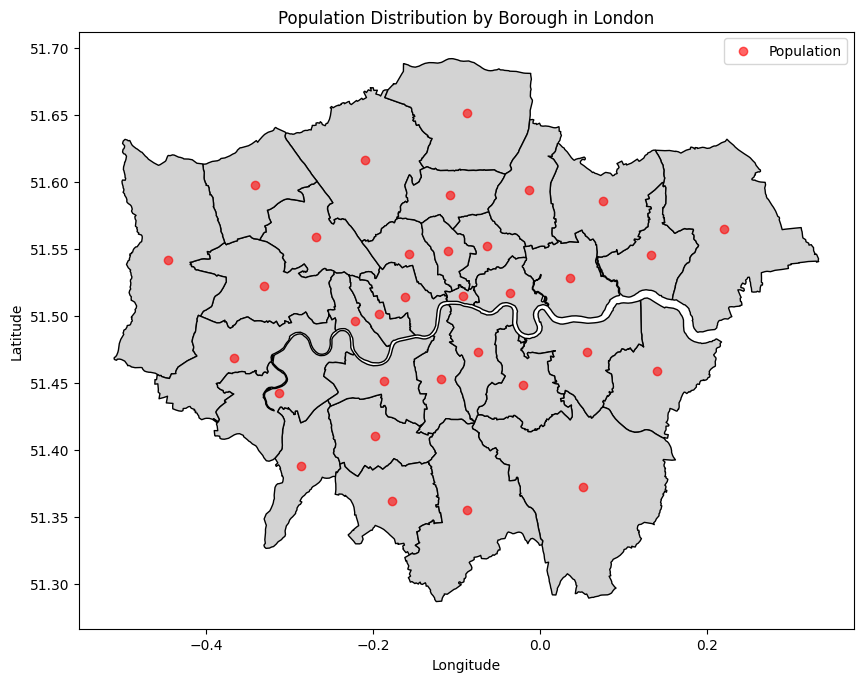

In [49]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the GeoJSON file containing London borough boundaries
london_geo = gpd.read_file("london_421.geojson")


# Merge the population data with the GeoDataFrame
merged_data = london_geo.merge(combined_df, left_on="name", right_on="local authority name")

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the boroughs
merged_data.plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot the population as scatter points
# Coordinates are extracted from the geometry centroids for each borough
merged_data["centroid"] = merged_data.geometry.centroid
merged_data['x'] = merged_data.centroid.x
merged_data['y'] = merged_data.centroid.y

# Plot the population data as scatter points
# Use `s` parameter to scale the size of dots based on population
sc = ax.scatter(
    merged_data['x'], 
    merged_data['y'], 
      # Adjust scaling factor as needed
    color="red", 
    alpha=0.6,
    label="Population"
)

# Add title and labels
ax.set_title("Population Distribution by Borough in London")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()

# Show the plot
plt.show()


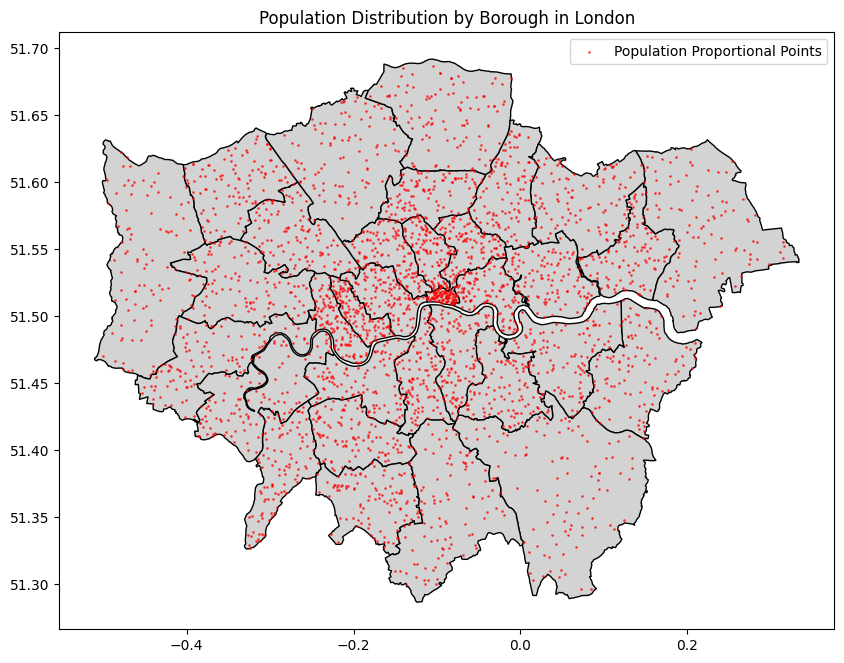

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from shapely.geometry import Polygon

# Load the GeoJSON file containing London borough boundaries
london_geo = gpd.read_file("london_421.geojson")

merged_data = london_geo.merge(combined_df, left_on="name", right_on="local authority name")


# Function to generate random points within a polygon
def generate_random_points_within_polygon(polygon, num_points):
    min_x, min_y, max_x, max_y = polygon.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if polygon.contains(random_point):
            points.append(random_point)
    return points

# Create a list to store all points generated for each borough
all_points = []

# Calculate points for each borough
for _, row in merged_data.iterrows():
    #population = row['Population']
    polygon = row['geometry']
    
    # Scale population to determine the number of points; adjust scale as needed
    num_points = 100 #int(population / 10000)  # Change divisor for desired density
    points = generate_random_points_within_polygon(polygon, num_points)
    
    all_points.extend(points)

# Convert points to a GeoDataFrame
points_gdf = gpd.GeoDataFrame(geometry=all_points, crs=london_geo.crs)

# Plot the borough boundaries
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(ax=ax, color="lightgrey", edgecolor="black")

# Overlay the randomly generated points
points_gdf.plot(ax=ax, color="red", markersize=1, alpha=0.6,label="")

# Add title and labels
ax.set_title("Population Distribution by Borough in London")
plt.legend()

# Show the plot
plt.show()


In [38]:
row

name                                         Barking and Dagenham
cartodb_id                                                      1
created_at                              2013-09-16 02:14:14+02:00
updated_at                              2013-09-16 02:14:14+02:00
geometry        MULTIPOLYGON (((0.068326 51.544414, 0.067047 5...
British_2001                                               132566
British_2011                                                91951
British_2021                                                67558
Name: 0, dtype: object